# 1. Load Train Model From Checkpoin

In [73]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
import os
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
import tensorflow as tf
import tensorflow.compat.v1 as tf
from object_detection.utils import config_util

In [84]:
WORKSPACE_PATH = r'\BrainTumor-Master\Tensorflow\workspace'
MODEL_PATH = WORKSPACE_PATH +"\models"
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
ANNOTATION_PATH = WORKSPACE_PATH +'\Annotations'
CONFIG_PATH = MODEL_PATH+'\\'+CUSTOM_MODEL_NAME+'\pipeline.config'
CHECKPOINT_PATH = MODEL_PATH +"\my_ssd_mobnet"
IMAGE_PATH = WORKSPACE_PATH + '\images\\test'

In [4]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(CONFIG_PATH)
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(CHECKPOINT_PATH, 'ckpt-6')).expect_partial()

In [5]:
@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 2. Detect in Real-Time

In [6]:
%matplotlib inline

In [7]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [8]:
category_index = label_map_util.create_category_index_from_labelmap(ANNOTATION_PATH+'/label_map.pbtxt')

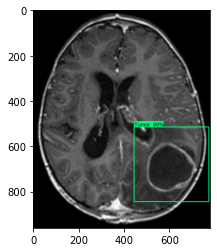

In [90]:
img = cv2.imread(IMAGE_PATH + '\\Y257.jpg')
image_np = np.array(img)


input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

## 4.1 More than one detections

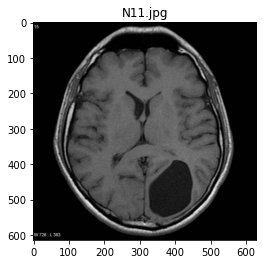

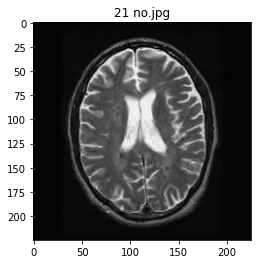

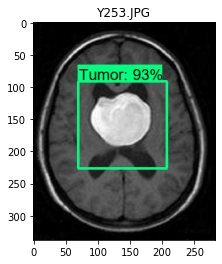

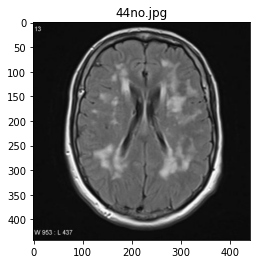

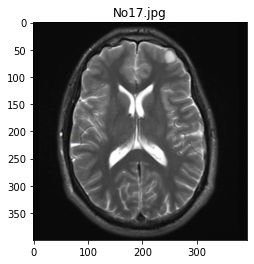

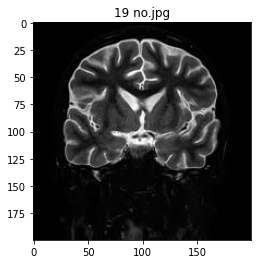

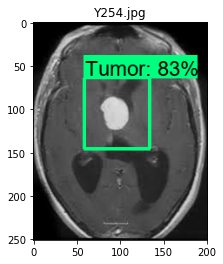

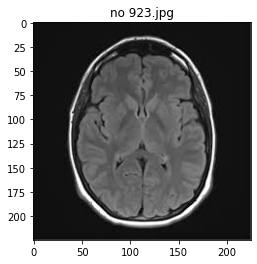

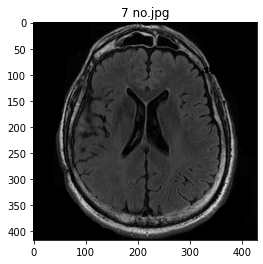

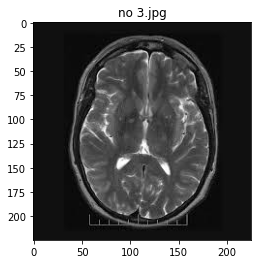

In [87]:
import random

for i in (IMAGE_PATH[:10]):
   
    random_filename = random.choice([x for x in os.listdir(IMAGE_PATH) if os.path.isfile(os.path.join(IMAGE_PATH, x))])
    
    
    img = cv2.imread(IMAGE_PATH + '/' +random_filename)
    image_np = np.array(img)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)
    
    
    plt.title(random_filename)
    plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
    plt.show()